In [107]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [108]:
#Constantes

L = 2 #[m]
dL= 0.5
q = 400 # [W/m^3]
Ta = 258.15 # [Kelvin]
i = 200 # Nombre de pas du maillage spatial [s]
dx=L/i; #Pas de discrétisation
ti = 0 # temps initial [s]
tf = 10**7 # temps final [s]
dt = 400 # pas de temps [s]
p = (tf-ti)/dt # nombre de pas de temps [S.U.]
k = 1 # [W/(m*K)]
h = 10 # [W/(m^2*K)]
Xi = 0.75 # [S.U.]
Cv = 1000 # [J/(Kg*K)]
rho = 2000 # [Kg/m^3]


In [109]:
#Conditions frontieres
# à x=0 : c1*T'(0)+c2*T(0) + c3 = 0 ; à x=L d1*T'(L) + d2*T(L) + d3 = 0
c1, c2, c3 = -k, h, -h*Ta
d1, d2, d3 = -k, -h, h*Ta



In [ ]:
#Initialisations des matrices
S=np.zeros(i+1,dtype=np.double)
A=np.diag(-2*np.ones(i+1),0)+np.diag(np.ones(i),-1)+np.diag(np.ones(i),1)
b=np.zeros(i+1,dtype=np.double)
u=np.zeros(i+1,dtype=np.double)

#Source
x=np.linspace(0,L,i+1)
S=(q*np.exp(-x/dL))/k
u0=np.full(i+1,Ta,dtype=np.double)


#Conditions frontieres dans la matrice A
A[0, 0], A[0, 1], A[0, 2] = (2* c2 *dx -3*c1)*Xi, 4*c1*Xi, -c1*Xi
A[i, i-2], A[i, i-1], A[i, i] = d1*Xi, -4*d1*Xi, (2*d2*dx+3*d1)*Xi

#Vecteur b et conditions frontieres
b=-S*dx**2; b[0]=-2*c3*dx-(2*c2*dx-3*c1)*(1-Xi)*u0[0]-4*c1*(1-Xi)*u0[1]+c1*(1-Xi)*u0[2] 
b[i]=-2*d3*dx-d1*(1-Xi)*u0[i-2]+4*d1*(1-Xi)*u0[i-1]-(2*d2*dx+3*d1)*(1-Xi)*u0[i]


In [111]:


M=np.diag(np.ones(i+1))

M[0,0]=0
M[i,i]=0
alpha = (Cv*rho)/k
A_prime = M-(dt/(alpha*dx**2))*Xi*A
b_prime = (M+(dt/(alpha*dx**2))*(1-Xi)*A)@u0-(dt/(alpha*dx**2))*(Xi*b+(1-Xi)*b)

t=ti
T_max=[]
ci=1

while t<tf:
    
    ci+=1
    u=np.linalg.solve(A_prime,b_prime)
    T_max.append(u.max())
    b_prime = (M+(dt/(alpha*dx**2))*(1-Xi)*A)@u-(dt/(alpha*dx**2))*(Xi*b+(1-Xi)*b)
    t=t+dt





37.33299897807842


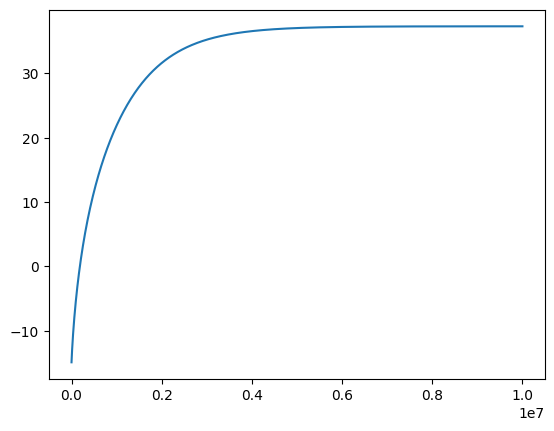

In [112]:
x=np.linspace(ti,tf,len(T_max))
T_max=np.array(T_max)
T_max=T_max - 273.15
print(T_max.max())
plt.plot(x,T_max)


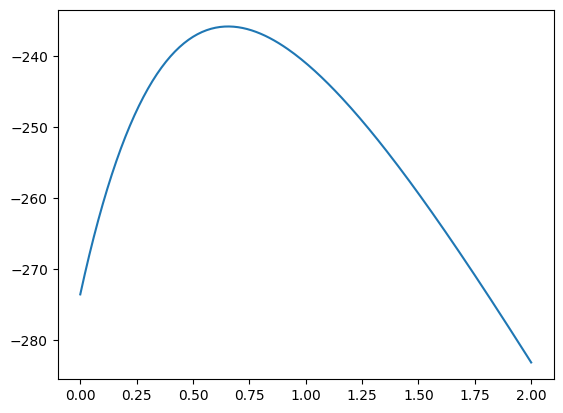

In [113]:
x=np.linspace(0,L,len(uf))
uf=np.array(uf)
uf=uf-273.15
plt.plot(x,uf)

In [114]:
print(uf.max())

-235.81700102192156
